# Agrupamento Hierárquico - Análise de Cluster

https://edisciplinas.usp.br/pluginfile.php/4109668/mod_resource/content/2/mineracaodadosbiologicos-parte4-completo.pdf

In [80]:
import pandas as pd
import numpy as np

#Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

#Metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Análise de Clusters
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage 
from scipy.cluster.hierarchy import fcluster 
from scipy.cluster.hierarchy import dendrogram

## Carregar Base de Dados - Iris

In [72]:
original = sns.load_dataset('iris')
classes = original['species']
df = original.drop(columns = 'species')
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Calcular a Distância

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
- A função **pdist** calcula as distâncias de pares entre observações no espaço n-dimensional. 

parâmetros

- **X** - array_like - Uma matriz m por n de m observações originais em um espaço n-dimensional.
- **metric** - str ou função, opcional - A métrica de distância a ser usada. A função de distância pode ser 'braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlação', 'cosseno', 'dados', 'euclidiano', 'hamming', 'jaccard', 'jensenshannon', ' kulsinski ',' mahalanobis ',' matching ',' minkowski ',' rogerstanimoto ',' russellrao ',' seuclidean ',' sokalmichener ',' sokalsneath ',' sqeuclidean ',' yule '. 

Retorno 

- **Y** - ndarray - Retorna uma matriz de distância condensada Y.



In [73]:
distancias = pdist(df.values, metric='euclidean')
distancias

array([0.53851648, 0.50990195, 0.64807407, ..., 0.6164414 , 0.64031242,
       0.76811457])

# Agrupamento Hierárquico - linkage

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html?highlight=linkage#scipy.cluster.hierarchy.linkage

- Realiza o agrupamento hierárquico/aglomerativo.

parâmetros

- **y** - ndarray - Uma matriz de distância condensada. Uma matriz de distância condensada é uma matriz plana contendo o triangular superior da matriz de distância. Esta é a forma que retorna. Alternativamente, uma coleção de vetores de observação em dimensões pode ser passada como uma matriz
- **method** - opcional - Algoritmo de linkage para usar. Consulte a seção abaixo para obter as descrições completas.
- **metric** - A métrica de distância a ser usada no caso de y é uma coleção de vetores de observação; ignorado de outra forma. Consulte a função para obter uma lista de métricas de distância válidas. Uma função de distância personalizada também pode ser usada como **pdist**
- **optimal_ordering** - Se For verdade, a matriz de ligação será reordenada para que a distância entre as folhas sucessivas seja mínima. Isso resulta em uma estrutura de árvore mais intuitiva quando os dados são visualizados. padrão para False, porque este algoritmo pode ser lento, particularmente em grandes conjuntos de dados

Retorno 

- **Z** - ndarray - O agrupamento hierárquico codificado como uma matriz de ligação.

In [74]:
hc = linkage(df, method='complete', metric='euclidean')

# Dendograma


Parâmetros

- **above_threshold_colorstr**, opcional - Esta sequência de cores matplotlib define a cor dos links acima do color_threshold. O padrão é .'C0'
- [Lista completa de Parâmetros](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html?highlight=dendrogram#scipy.cluster.hierarchy.dendrogram)


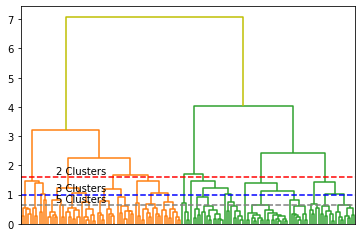

In [75]:
fig, ax = plt.subplots()

dendrogram(
    hc, 
    above_threshold_color='y',
    no_labels = True,
    ax = ax
)

ax.axhline(y = 1.6, color = 'red', linestyle = '--')
ax.text(y = 1.7, x = 160, s = '2 Clusters' )

ax.axhline(y = 1, color = 'blue', linestyle = '--')
ax.text(y = 1.1, x = 160, s = '3 Clusters' )

ax.axhline(y = .65, color = 'gray', linestyle = '--')
ax.text(y = .75, x = 160, s = '5 Clusters' )

plt.show()


# Gerar Grupos/Rótulos

O método **fcluster** recebe como entrada uma# hierarquia gerada pelo metodo linkage e extrai# grupos da mesma segundo algum criterio.

Parâmetros

- **Z** - ndarray - O agrupamento hierárquico codificado com a matriz retornada pela função de ligação.
- **t** - escalar - Para critérios 'inconsistentes', 'distância' ou 'monocrit', este é o limiar a ser aplicado ao formar aglomerados planos. Para critérios de 'maxclust' ou 'maxclust_monocrit', este seria o número máximo de clusters solicitados.
- **criterion** - str, opcional - O critério a ser utilizado na formação de aglomerados planos. Este pode ser qualquer um dos seguintes valores:
    - inconsistent: Se um nó de aglomerado e todos os seus descendentes têm um valor inconsistente menor ou igual a t,então todos os seus descendentes de folhas pertencem ao mesmo aglomerado plano. Quando nenhum cluster não-singleton atende a esse critério, cada nó é atribuído ao seu próprio cluster. (Padrão)
    - distance: Forma aglomerados planos para que as observações originais em cada aglomerado plano não tenham uma distância cofenética maior do que t.
    - maxclust: Encontra um limiar mínimo para que a distância cofenética entre quaisquer duas observações originais no mesmo aglomerado plano não seja mais do que e não mais do que aglomerados planos t são formados.rr
    - monocrit: Forma um cluster plano a partir de um nó de cluster c com índice i quando .monocrit[j] <= t.
    - maxclust_monocrit: Forma um cluster plano a partir de um nó de cluster não-singleton quando para todos os índices de cluster abaixo e incluindo . é minimizado de tal forma que não mais do que aglomerados planos são formados. monocrito deve ser monótono. Por exemplo, para minimizar o limiar t em valores máximos de inconsistência para que não sejam formados mais de 3 clusters planos, faça:cmonocrit[i] <= ricrt
- **depth* - int, opcional - A profundidade máxima para realizar o cálculo da inconsistência. Não tem significado para os outros critérios. O padrão é 2.
- **R** - ndarray, opcional - A matriz de inconsistência para usar para o critério 'inconsistente'. Esta matriz é calculada se não for fornecida.
- **monocrit** -  ndarray,opcional - Uma matriz de comprimento n-1. monocrit[i] é a estatística sobre as quais não-singleton i é limiar. O vetor monocrit deve ser monotônico, ou seja, dado um nó c com índice i, para todos os índices de nó j correspondentes a nós abaixo de c, .monocrit[i] >= monocrit[j]

Retorna

- **fcluster** - ndarray - Uma matriz de comprimento n.T[i]. É o número de cluster plano ao qual a observação  i original pertence.

## Grupos por Distâncias - distance

Abaixo serao extraidos os grupos por meio de um limiar de distancia. A variavel 'rotulos' sera um numpy.array onde o valor contido em rotulos[i] indica o rotulo do objeto i.

In [76]:
# T = 0.65 = H com 5 clusters
rotulos_dist = fcluster(hc, t = 0.65, criterion='distance')

rotulos_dist

array([30, 29, 31, 31, 30, 36, 31, 30, 31, 29, 36, 37, 29, 31, 35, 35, 34,
       30, 36, 37, 36, 37, 32, 37, 37, 29, 37, 30, 30, 29, 29, 36, 34, 34,
       29, 30, 36, 30, 31, 30, 30, 33, 31, 37, 37, 29, 37, 31, 36, 30, 18,
       19, 18, 26, 17, 23, 19, 21, 17, 26, 22, 24, 27, 20, 25, 17, 23, 24,
       15, 26, 11, 24, 13, 20, 20, 17, 17, 18, 20, 25, 26, 26, 24, 13, 23,
       19, 18, 15, 24, 26, 23, 20, 24, 21, 24, 24, 24, 20, 21, 24,  7, 12,
        1,  9,  9,  2, 28,  1, 10,  4,  8, 13,  8, 12, 12,  8,  9,  3,  2,
       16,  6, 12,  2, 13,  6,  1, 13, 11,  9,  1,  1,  3,  9, 13, 14,  5,
        7,  9, 11,  8,  6,  8, 12,  6,  6,  8, 13,  8,  7, 11],
      dtype=int32)

## Grupos por Quantidades - maxclust

Caso o criterio escolhido seja o numero de grupos, o metodo fcluster estima sozinho um valor de distancia de modo que t grupos sejam formados

In [77]:
# T = 3 é igual à 3 grupos
rotulos_k = fcluster(hc, t=3, criterion='maxclust')

rotulos_k

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

# Matriz de Confusão

- A biblioteca **sklearn.metrics** tem a função **confusion_matrix** que irá nos retornar a matriz de confusão dos dados previstos. 
- **y_true** - Valores alvo verdadeiros (corretos). 
- **y_pred** - Alvos estimados conforme retornados por um classificador. 
- **labels** - Lista de rótulos para indexar a matriz. Isso pode ser usado para reordenar ou selecionar um subconjunto de rótulos. Se Nenhum for fornecido, aqueles que aparecem pelo menos uma vez em y_true ou y_pred são usados na ordem de classificação 
- **sample_weight** - Pesos de amostra. 
- **normalize**: {‘true’, ‘pred’, ‘all’}, default=None - Normaliza a matriz de confusão sobre as condições verdadeiras (linhas), preditas (colunas) ou toda a população. Se nenhum, a matriz de confusão não será normalizada. 

In [78]:
teste = classes.map({
    'setosa' : 3,
    'versicolor': 2,
    'virginica': 1
})

previsao = rotulos_k

In [81]:
confusion_matrix(teste, previsao)

array([[49,  1,  0],
       [23, 27,  0],
       [ 0,  0, 50]], dtype=int64)

## Personalizando a matriz de confusão

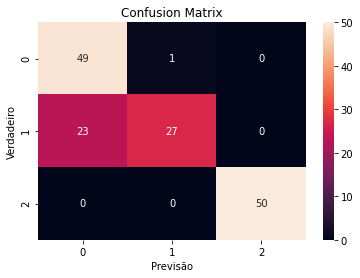

In [82]:
cm = confusion_matrix(teste, previsao)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Previsão');
ax.set_ylabel('Verdadeiro'); 
ax.set_title('Confusion Matrix'); 

# Métricas

- A biblioteca **sklearn.metrics** tem a função **classification_report** que cria um relatório de texto mostrando as principais métricas de classificação. 
- **y_true** - Valores alvo verdadeiros (corretos). 
- **y_pred** - Alvos estimados conforme retornados por um classificador. 
- **labels** - Lista opcional de índices de rótulo a serem incluídos no relatório. 
- **target_names** - Nomes de exibição opcionais que correspondem aos rótulos (mesma ordem) 
- **sample_weight** - Peso das Amostras
- **digits** - Número de dígitos para formatar valores de ponto flutuante de saída. Quando output_dict for True, isso será ignorado e os valores retornados não serão arredondados.
- **output_dict** - Se verdadeiro, retorna a saída como dict
- **zero_division**: 'warn', 0 or 1, default='warn' - Define o valor a ser retornado quando houver uma divisão zero. Se definido como “aviso”, funciona como 0, mas os avisos também são gerados. 

In [83]:
print(classification_report(teste, previsao))

              precision    recall  f1-score   support

           1       0.68      0.98      0.80        50
           2       0.96      0.54      0.69        50
           3       1.00      1.00      1.00        50

    accuracy                           0.84       150
   macro avg       0.88      0.84      0.83       150
weighted avg       0.88      0.84      0.83       150



## Acurácia

- A função **accuracy_score** pode ser usada para verificar a acurácia dos dados

In [84]:
accuracy_score(teste, previsao)

0.84